# EX11. ÌîÑÎ°úÏ†ùÌä∏ : ÌèêÎ†¥ÏïÑ Í∏∞Îã§Î†§Îùº!
### ÌèêÎ†¥ÏùÑ ÏßÑÎã®Ìï¥Î≥¥Í≥† ÌèêÎ†¥ ÏßÑÎã®Í∏∞ ÏÑ±Îä•Í∞úÏÑ† Ìï¥Î≥¥Îäî ÌîÑÎ°úÏ†ùÌä∏
----------------------------------

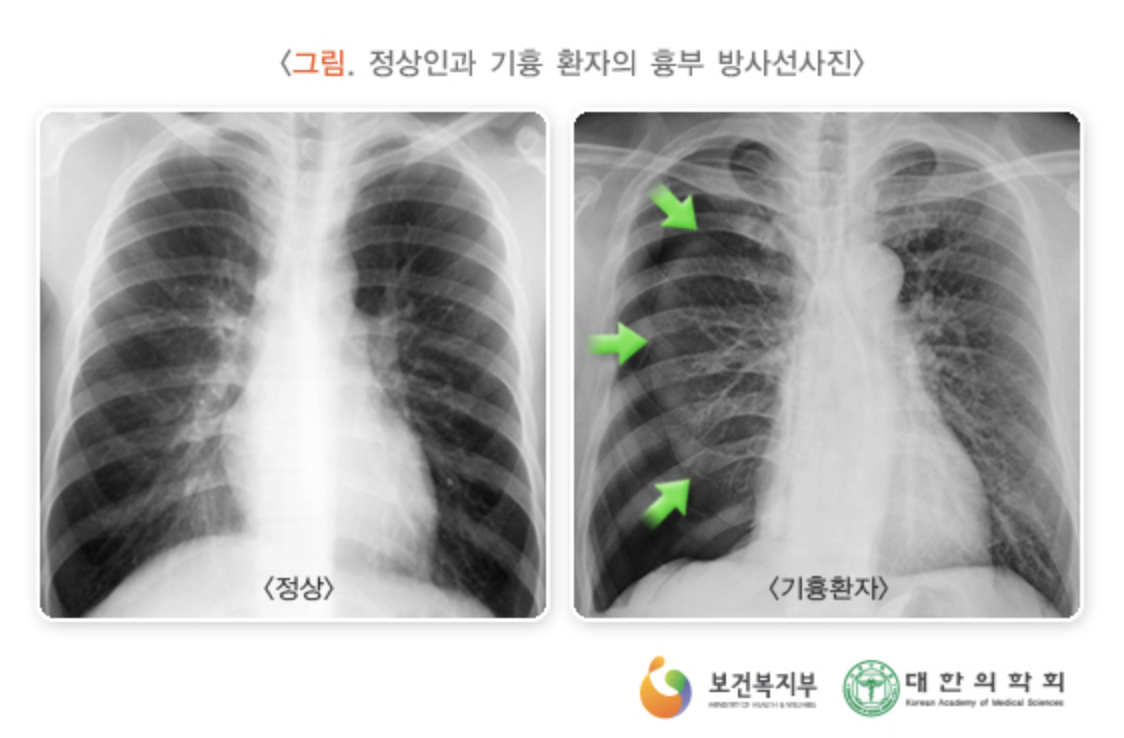


## X-RAY ÏòÅÏÉÅÏùÑ Ï¥¨ÏòÅÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÎêòÎäî ÏûêÏÑ∏ Î∂ÑÎ•ò

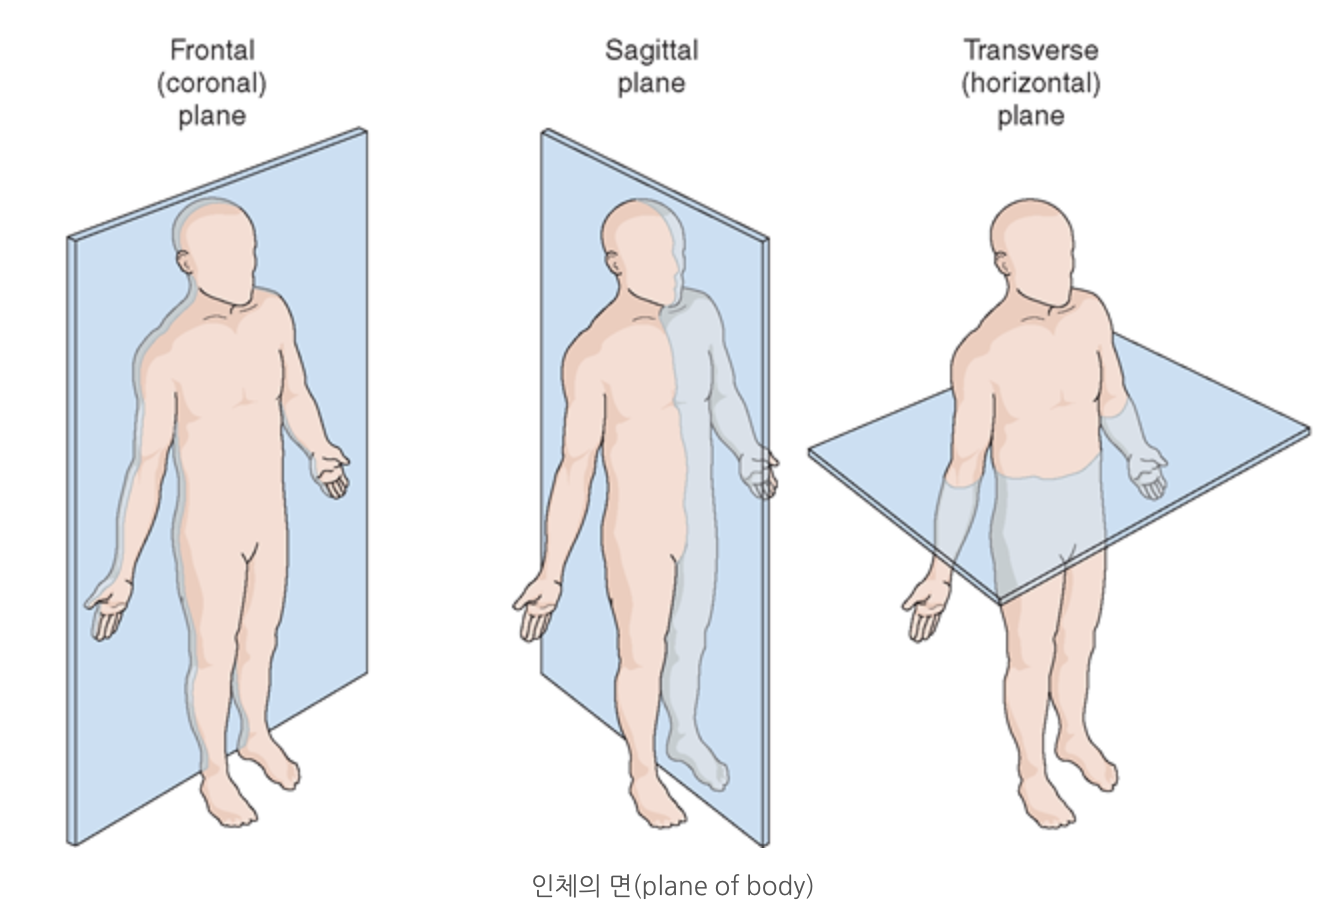
[Ï∞∏Í≥†](https://blog.naver.com/PostView.nhn?blogId=bagj97&logNo=221223459080&categoryNo=16&parentCategoryNo=0&viewDate=&currentPage=1&postListTopCurrentPage=1&from=postView)

#### * Sagittal plane : ÏãúÏÉÅÎ©¥. ÏÇ¨ÎûåÏùÑ ÏôºÏ™ΩÍ≥º Ïò§Î•∏Ï™ΩÏùÑ ÎÇòÎàÑÎäî Î©¥.

#### * Coronal plane : Í¥ÄÏÉÅÎ©¥. Ïù∏Ï≤¥Î•º ÏïûÎí§Î°ú ÎÇòÎàÑÎäî Î©¥.

#### * Transverse plane : Ìö°Îã®Î©¥(ÏàòÌèâÎ©¥). Ïù∏Ï≤¥Î•º ÏÉÅÌïòÎ°ú ÎÇòÎàÑÎäî Î©¥.

### Ïò§Îäò ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞Îäî Î™®Îëê Í¥ÄÏÉÅÎ©¥ Ïù¥ÎØ∏ÏßÄÎ°ú ÎêòÏñ¥ ÏûàÏùå
------------------

# ‚úÖ Î™©Ï∞®
-----------------------------
#### Step 1. Ïã§ÌóòÌôòÍ≤Ω Set-up   

#### Step 2. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞    

#### Step 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî    

#### Step 4. CNN Î™®Îç∏ÎßÅ    

#### Step 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨    

#### Step 6. Î™®Îç∏ ÌõàÎ†®    

#### Step 7. Í≤∞Í≥º ÌôïÏù∏Í≥º ÏãúÍ∞ÅÌôî    

#### Step8. Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

#### Step9. ÌèêÎ†¥ ÏßÑÎã®Í∏∞ ÏÑ±Îä•Í∞úÏÑ†

---------------------------------

## Step 1. Ïã§ÌóòÌôòÍ≤Ω Set-up

In [1]:
import os, re
import random, math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìúÌï† Îïå Îπ†Î•¥Í≤å Î°úÎìúÌï† Ïàò ÏûàÎèÑÎ°ùÌïòÎäî ÏÑ§Ï†ï Î≥ÄÏàò
AUTOTUNE = tf.data.experimental.AUTOTUNE
# X-RAY Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Î≥ÄÏàò
IMAGE_SIZE = [180, 180]

# Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú Î≥ÄÏàò
ROOT_PATH = os.path.join(os.getenv('HOME'), 'aiffel')
TRAIN_PATH = ROOT_PATH + '/chest_xray2/data/train/*/*'
VAL_PATH = ROOT_PATH + '/chest_xray2/data/val/*/*'
TEST_PATH = ROOT_PATH + '/chest_xray2/data/test/*/*'

# ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌï† Îïå ÏïÑÎûò Îëê Î≥ÄÏàòÎ•º Î≥ÄÍ≤ΩÌï¥Î≥¥ÏÑ∏Ïöî
BATCH_SIZE = 16
EPOCHS = 25

print(ROOT_PATH)


/aiffel/aiffel


## Step 2. Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [3]:
train_filenames = tf.io.gfile.glob(TRAIN_PATH)
test_filenames = tf.io.gfile.glob(TEST_PATH)
val_filenames = tf.io.gfile.glob(VAL_PATH)

print(len(train_filenames))
print(len(test_filenames))
print(len(val_filenames))


5216
624
16


train : 5216, test : 624, validation : 16 | Í∞úÏàòÎπÑÎäî 89%,10.7%,0.3% validation Í∞úÏàòÍ∞Ä Ï†ÅÏñ¥ÏÑú Îç∞Ïù¥ÌÑ∞ Îçî Í∞ÄÏ†∏Ïò§Í∏∞

In [4]:
# train Îç∞Ïù¥ÌÑ∞ÏôÄ validation Îç∞Ïù¥ÌÑ∞Î•º Î™®Îëê filenamesÏóê Îã¥ÏäµÎãàÎã§
filenames = tf.io.gfile.glob(TRAIN_PATH)
filenames.extend(tf.io.gfile.glob(VAL_PATH))

# Î™®ÏïÑÏßÑ filenamesÎ•º 8:2Î°ú ÎÇòÎàïÎãàÎã§
train_size = math.floor(len(filenames)*0.8)
random.seed(8)
random.shuffle(filenames)
train_filenames = filenames[:train_size]
val_filenames = filenames[train_size:]

print(len(train_filenames))
print(len(val_filenames))


4185
1047


### train Îç∞Ïù¥ÌÑ∞ ÏïàÏóê Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄ ÏàòÏôÄ ÌèêÎ†¥ Ïù¥ÎØ∏ÏßÄ Ïàò ÌôïÏù∏ÌïòÍ∏∞

In [5]:
print(f'Normal image path\n{filenames[0]}')
print(f'Pneumonia image path\n{filenames[2000]}')


Normal image path
/aiffel/aiffel/chest_xray2/data/train/NORMAL/IM-0614-0001.jpeg
Pneumonia image path
/aiffel/aiffel/chest_xray2/data/train/PNEUMONIA/person1346_bacteria_3430.jpeg


In [6]:
# Ïù¥Ï†ú ÌååÏùº Í≤ΩÎ°úÏóê NORMALÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ©¥ Ï†ïÏÉÅ Ïù¥ÎØ∏ÏßÄÎ•º ÏÖÄ Ïàò ÏûàÏäµÎãàÎã§.
COUNT_NORMAL = len([filename for filename in train_filenames if "NORMAL" in filename])
print(f"Normal images count in training set: {COUNT_NORMAL}")

# ÌååÏùº Í≤ΩÎ°úÏóê PNEUMONIAÏù¥ ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ©¥ ÌèêÎ†¥ Ïù¥ÎØ∏ÏßÄÎèÑ ÏÖÄ Ïàò ÏûàÏäµÎãàÎã§.
COUNT_PNEUMONIA = len([filename for filename in train_filenames if "PNEUMONIA" in filename])
print(f"Pneumonia images count in training set: {COUNT_PNEUMONIA}")


Normal images count in training set: 1070
Pneumonia images count in training set: 3115


ÏúÑÏóê Í≤∞Í≥ºÎ•º Î≥¥Î©¥ ÌèêÎ†¥Ïù¥ÎØ∏ÏßÄÍ∞Ä Ï†ïÏÉÅÏù¥ÎØ∏ÏßÄÎ≥¥Îã§ 3Î∞∞ Îçî ÎßéÏù¥ ÏûàÏùå \
Îã§Ïùå Îã®Í≥ÑÏóêÏÑú ÏÇ¨Ïö©Ìï† CNNÎ™®Îç∏Ïùò Í≤ΩÏö∞ Îç∞Ïù¥ÌÑ∞Í∞Ä ÌÅ¥ÎûòÏä§Î≥Ñ balanceÍ∞Ä Ï¢ãÏúºÎ©¥ Ï¢ãÏùÑÏàòÎ°ù trainingÏùÑ ÏûòÌï® - Ï∞®ÌõÑÏóê Ï°∞Ï†ïÌï¥ÏïºÌï® \
(testÏôÄ valÎç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÌèâÍ∞ÄÌïòÍ∏∞ ÏúÑÌï¥ ÏÇ¨Ïö©ÌïòÎäîÍ±∞Îùº imbalanceÌï¥ÎèÑ ÏÉÅÍ¥ÄÏóÜÏùå)

In [7]:
# tf.dataÎäî tensorflowÏóêÏÑú ÌïôÏäµ ÏãúÌÇ¨ Îïå Î∞∞ÏπòÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ Ìö®Ïú®Ï†ÅÏúºÎ°ú Ìï† Ïàò ÏûàÏùå
train_list_ds = tf.data.Dataset.from_tensor_slices(train_filenames)
val_list_ds = tf.data.Dataset.from_tensor_slices(val_filenames)


In [8]:
# train Îç∞Ïù¥ÌÑ∞ÏÖã, validation Îç∞Ïù¥ÌÑ∞ÏÖã Í∞úÏàò ÌôïÏù∏
TRAIN_IMG_COUNT = tf.data.experimental.cardinality(train_list_ds).numpy()
print(f"Training images count: {TRAIN_IMG_COUNT}")

VAL_IMG_COUNT = tf.data.experimental.cardinality(val_list_ds).numpy()
print(f"Validating images count: {VAL_IMG_COUNT}")


Training images count: 4185
Validating images count: 1047


In [9]:
# ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ ÎßåÎì§Ïñ¥Ï£ºÎäî Ìï®Ïàò
# ÌååÏùº Í≤ΩÎ°úÏùò ÎÅùÏóêÏÑú ÎëêÎ≤àÏß∏ Î∂ÄÎ∂ÑÏùÑ ÌôïÏù∏ÌïòÎ©¥ ÏñëÏÑ±Í≥º ÏùåÏÑ±ÏùÑ Íµ¨Î∂ÑÌï† Ïàò ÏûàÏäµÎãàÎã§
def get_label(file_path):
    parts = tf.strings.split(file_path, os.path.sep)
    return parts[-2] == "PNEUMONIA"   # ÌèêÎ†¥Ïù¥Î©¥ ÏñëÏÑ±(True), ÎÖ∏ÎßêÏù¥Î©¥ ÏùåÏÑ±(False)


In [10]:
# Ïù¥ÎØ∏ÏßÄ Îç∞Ïù¥ÌÑ∞ ÏÇ¨Ïù¥Ï¶àÍ∞Ä Ï†úÍ∞ÅÍ∞ÅÏùº Ïàò ÏûàÏñ¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à ÌÜµÏùº ÏãúÌÇ§Í≥†
# GPU Î©îÎ™®Î¶¨Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú ÏÇ¨Ïö©ÌïòÍ∏∞ ÏúÑÌï¥ÏÑú Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶à Ï§ÑÏó¨Î≥¥Í∏∞
# Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú Î∞îÍøà
def decode_img(img):
    img = tf.image.decode_jpeg(img, channels=3) # Ïù¥ÎØ∏ÏßÄÎ•º uint8 tensorÎ°ú ÏàòÏ†ï
    img = tf.image.convert_image_dtype(img, tf.float32) # float32 ÌÉÄÏûÖÏúºÎ°ú ÏàòÏ†ï
    img = tf.image.resize(img, IMAGE_SIZE) # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º IMAGE_SIZEÎ°ú ÏàòÏ†ï
    return img

# Ïù¥ÎØ∏ÏßÄ ÌååÏùºÏùò Í≤ΩÎ°úÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤®ÏùÑ ÏùΩÏñ¥Ïò¥
def process_path(file_path):
    label = get_label(file_path) # ÎùºÎ≤® Í≤ÄÏ∂ú
    img = tf.io.read_file(file_path) # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
    img = decode_img(img) # Ïù¥ÎØ∏ÏßÄÎ•º ÏïåÎßûÏùÄ ÌòïÏãùÏúºÎ°ú ÏàòÏ†ï
    return img, label


In [11]:
# train Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º valÎç∞Ïù¥ÌÑ∞ÏÖã ÎßåÎì§Í∏∞
train_ds = train_list_ds.map(process_path, num_parallel_calls=AUTOTUNE) # Ï¥àÍ∏∞ÌôîÌïú AUTOTUNEÏùÑ Ïù¥Ïö©ÌïòÎ©¥ Îçî Îπ†Î•¥Í≤å Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Í∞ÄÎä•
val_ds = val_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)


#### Ïù¥ÎØ∏ÏßÄÍ∞Ä resizeÍ∞Ä Ïûò ÎêêÎäîÏßÄ, labelÏù¥ Ïûò Îì§Ïñ¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏

In [12]:
for image, label in train_ds.take(1): # train_ds.take(1)ÏùÄ ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Îßå Í∞ÄÏ†∏Ïò®Îã§Îäî ÏùòÎØ∏
    print("Image shape: ", image.numpy().shape)
    print("Label: ", label.numpy())
    

Image shape:  (180, 180, 3)
Label:  False


#### ÏúÑÏôÄ Í∞ôÏù¥ test Îç∞Ïù¥ÌÑ∞ÏÖãÎèÑ ÎßåÎì§Í∏∞

In [13]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

# Îç∞Ïù¥ÌÑ∞ Í∞úÏàò ÌôïÏù∏
print(TEST_IMAGE_COUNT)

624


In [14]:
# prepare_for_training() Ìï®ÏàòÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º Ìö®Ïú®Ï†ÅÏúºÎ°ú Ìï† Ïàò ÏûàÎèÑÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Î≥ÄÌôò ÏãúÏºúÏ§å
def prepare_for_training(ds, shuffle_buffer_size=1000): # shuffle(): Í≥†Ï†ï ÌÅ¨Í∏∞ Î≤ÑÌçºÎ•º Ïú†ÏßÄÌïòÍ≥† Ìï¥Îãπ Î≤ÑÌçºÏóêÏÑú Î¨¥ÏûëÏúÑÎ°ú Í∑†ÏùºÌïòÍ≤å Îã§Ïùå ÏöîÏÜåÎ•º ÏÑ†ÌÉù
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat() # repeat() : epochÎ•º ÏßÑÌñâÌïòÎ©¥ÏÑú Ïó¨Îü¨ Î≤à Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Î∂àÎü¨Ïò§Í≤å ÎêòÎäîÎç∞, repeatÏùÑ ÏÇ¨Ïö©ÌïòÎ©¥ Ïó¨Îü¨Î≤à Îç∞Ïù¥ÌÑ∞ÏÖã ÏÇ¨Ïö©Í∞ÄÎä•
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE) # prefetch(): ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÎÇòÎà†ÏÑú ÏùΩÏñ¥Ïò§Í∏∞ ÎïåÎ¨∏Ïóê Î¶¨ÏÜåÏä§Ïùò Ïú†Ìú¥ ÏÉÅÌÉúÎ•º Ï§ÑÏùº Ïàò ÏûàÏùå
    return ds

train_ds = prepare_for_training(train_ds)
val_ds = prepare_for_training(val_ds)

## Step 3. Îç∞Ïù¥ÌÑ∞ ÏãúÍ∞ÅÌôî

### Í∏∞Ï°¥ train_ds ÏãúÍ∞ÅÌôî

<PrefetchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.bool)>


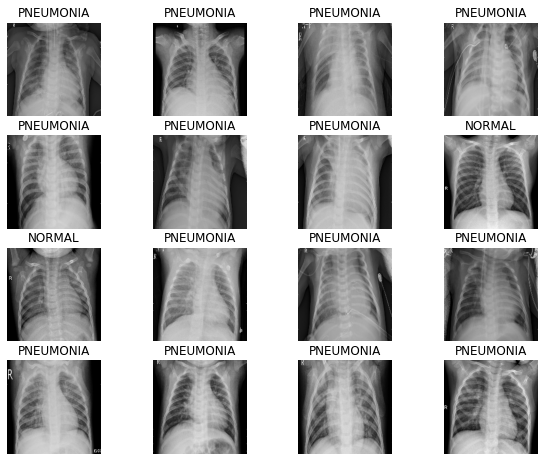

In [15]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïó¨Îü¨Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE): # trainÏóê ÏûàÎäî batch Ï§ë Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º Ï∂îÏ∂úÌï¥ÏÑú Ï∂îÏ∂úÎêú Î∞∞ÏπòÎ•º Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàî
        ax = plt.subplot(5,math.ceil(BATCH_SIZE/5),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")


image_batch, label_batch = next(iter(train_ds))
show_batch(image_batch.numpy(), label_batch.numpy())
print(train_ds)

## Step 4. CNN Î™®Îç∏ÎßÅ

In [16]:
# Íµ¨ÏÑ±ÏùÄ ConvolutionÏùÑ ÎëêÎ≤à ÏßÑÌñâÌïòÍ≥† 
# Batch NormalizationÏùÑ ÌÜµÌï¥ÏÑú Gradient vanishing, Gradient ExplodingÏùÑ Ìï¥Í≤∞
# MaxPoolingÌïòÍ∏∞
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])
    
    return block

In [17]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    
    return block

In [18]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return model

## Step 5. Îç∞Ïù¥ÌÑ∞ imbalance Ï≤òÎ¶¨

In [19]:
weight_for_0 = (1 / COUNT_NORMAL)*(TRAIN_IMG_COUNT)/2.0 
weight_for_1 = (1 / COUNT_PNEUMONIA)*(TRAIN_IMG_COUNT)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for NORMAL: {:.2f}'.format(weight_for_0))
print('Weight for PNEUMONIA: {:.2f}'.format(weight_for_1))

Weight for NORMAL: 1.96
Weight for PNEUMONIA: 0.67


## Step 6. Î™®Îç∏ ÌõàÎ†®

In [20]:
with tf.device('/GPU:0'):
    model = build_model()

    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=METRICS
    )

In [21]:
with tf.device('/GPU:0'):
    history = model.fit(
        train_ds,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_ds,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/25
261/261 [==============================] - 56s 144ms/step - loss: 0.4644 - accuracy: 0.7503 - precision: 0.9354 - recall: 0.7101 - val_loss: 0.6855 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 2/25
261/261 [==============================] - 35s 134ms/step - loss: 0.2561 - accuracy: 0.9035 - precision: 0.9745 - recall: 0.8958 - val_loss: 1.1605 - val_accuracy: 0.7327 - val_precision: 0.7327 - val_recall: 1.0000
Epoch 3/25
261/261 [==============================] - 35s 134ms/step - loss: 0.2191 - accuracy: 0.9180 - precision: 0.9775 - recall: 0.9118 - val_loss: 0.1348 - val_accuracy: 0.9490 - val_precision: 0.9404 - val_recall: 0.9934
Epoch 4/25
261/261 [==============================] - 35s 134ms/step - loss: 0.1862 - accuracy: 0.9320 - precision: 0.9807 - recall: 0.9283 - val_loss: 0.2270 - val_accuracy: 0.8942 - val_precision: 0.8756 - val_recall: 0.9974
Epoch 5/25
261/261 [==============================] - 35s 134ms/step - loss: 0.1624 - accura

## Step 7. Í≤∞Í≥º ÌôïÏù∏Í≥º ÏãúÍ∞ÅÌôî

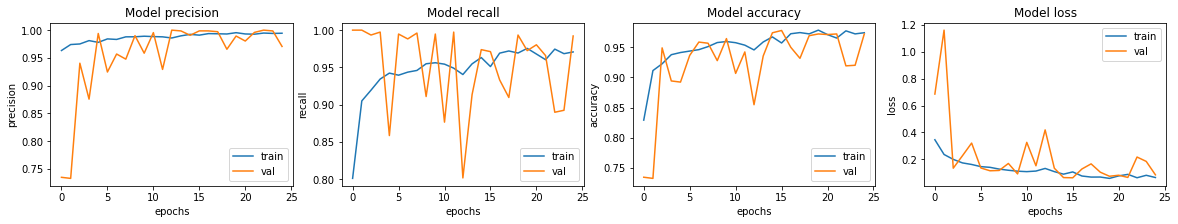

In [22]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])

## Step8. Î™®Îç∏ ÌèâÍ∞ÄÌïòÍ∏∞

In [23]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 3s 74ms/step - loss: 1.8050 - accuracy: 0.7196 - precision: 0.6903 - recall: 1.0000
Loss: 1.8050484657287598,
Accuracy: 0.7195512652397156,
Precision: 0.6902654767036438,
Recall: 1.0


recallÍ∞íÏùÄ ÎÜíÏßÄÎßå accuracyÍ∞íÏùÄ Ï°∞Í∏à ÎÇÆÏïÑÏÑú Ïò¨Î†§Î≥¥ÎèÑÎ°ù ÌïòÏûê

## Step9. ÌèêÎ†¥ ÏßÑÎã®Í∏∞ ÏÑ±Îä•Í∞úÏÑ†

In [24]:
test_list_ds = tf.data.Dataset.list_files(TEST_PATH)
TEST_IMAGE_COUNT = tf.data.experimental.cardinality(test_list_ds).numpy()
test_ds = test_list_ds.map(process_path, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE)

ÏùòÎ£å ÏòÅÏÉÅ Ïù¥ÎØ∏ÏßÄÏùò ÌäπÏÑ±ÏÉÅ Îç∞Ïù¥ÌÑ∞Îäî Ïñ∏Ï†úÎÇò Ï∂©Î∂ÑÌïòÏßÄ ÏïäÍ∏∞ÎïåÎ¨∏Ïóê Ïù¥Î•º Í∑πÎ≥µÌï† Ïàò ÏûàÎäî Î∞©Î≤ïÏúºÎ°ú
**augmentation Í∏∞Î≤ï**ÏùÑ Í≥†Î†§

In [35]:
def augment(image, label):
    image = tf.image.random_flip_left_right(image) # ÎûúÎç§ Ï¢åÏö∞Î∞òÏ†Ñ
    return image, label

def prepare_for_training(ds, shuffle_buffer_size=1000):
    ds = ds.map(augment, num_parallel_calls=2) # data augmentation Í≥ºÏ†ï Ï∂îÍ∞Ä
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    ds = ds.repeat()
    ds = ds.batch(BATCH_SIZE)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    
    return ds

train_ds_aug = prepare_for_training(train_ds)
val_ds_aug = prepare_for_training(val_ds)

print(train_ds_aug)

<ParallelMapDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.bool)>


### Augmentation ÏãúÍ∞ÅÌôî

#### show_batch() Ìï®ÏàòÎ•º ÌÜµÌï¥ Ïã§Ï†úÎ°ú Ï¢åÏö∞ Î∞òÏ†Ñ Îì±Ïù¥ Ï†úÎåÄÎ°ú Ï≤òÎ¶¨ÎêòÏóàÎäîÏßÄ ÌôïÏù∏

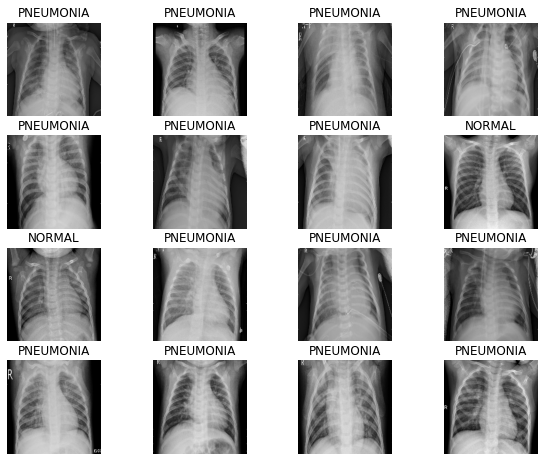

In [36]:
# Ïù¥ÎØ∏ÏßÄ Î∞∞ÏπòÎ•º ÏûÖÎ†•ÌïòÎ©¥ Ïó¨Îü¨Ïû•Ïùò Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§çÎãàÎã§.
def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10,10))
    for n in range(BATCH_SIZE): # trainÏóê ÏûàÎäî batch Ï§ë Ï≤´ Î≤àÏß∏ Î∞∞ÏπòÎ•º Ï∂îÏ∂úÌï¥ÏÑú Ï∂îÏ∂úÎêú Î∞∞ÏπòÎ•º Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Îç∞Ïù¥ÌÑ∞ÏÖãÏúºÎ°ú ÎÇòÎàî
        ax = plt.subplot(5,math.ceil(BATCH_SIZE/5),n+1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

image_batch_aug, label_batch_aug = next(iter(train_ds_aug))
show_batch(image_batch.numpy(), label_batch.numpy())

### CNN Î™®Îç∏ÎßÅ

### DropoutÏùÑ Ïì∞ÏßÄ ÏïäÍ≥† Ìï¥Î≥¥Í∏∞

In [37]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        #tf.keras.layers.Dropout(dropout_rate)    # dropoutÏùÑ Ï†úÍ±∞ÌïòÍ≥† Ïã§ÌñâÌï¥Î≥¥Í∏∞
    ])
    return block

In [38]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

### Î™®Îç∏ÌõàÎ†®ÌïòÍ∏∞

In [39]:
with tf.device('/GPU:0'):
    model = build_model()
    
    # ÏÑ±Í≥ºÏóê ÎåÄÌï¥ÏÑú Ï∏°Ï†ïÌïòÍ∏∞ ÏúÑÌïú metricsÏúºÎ°ú 'accuracy', 'precision', 'recall'ÏùÑ ÏÇ¨Ïö©
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam', # optimizerÎ°ú 'adam'ÏùÑ ÏÇ¨Ïö©
        loss='binary_crossentropy', # Ïù¥ÎØ∏ÏßÄÏùò ÎùºÎ≤®Ïù¥ Îëê Í∞úÎ∞ñÏóê ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê "binary_cross entropy" lossÎ•º ÏÇ¨Ïö©
        metrics=METRICS
    )

### Î®ºÏ†Ä recallÏùÑ Í∏∞Ï§ÄÏúºÎ°ú earlystoppingÌï¥Î≥¥Í∏∞

[ÏäπÌôòÎãò ÏΩîÎìú](https://github.com/RobotPoly/exploration/blob/main/%5BE-11%5DPneumonia/%5BE-11%5DPneumonia.ipynb) Ï∞∏Í≥†ÌïòÏòÄÏäµÎãàÎã§!

In [40]:
from keras.callbacks import EarlyStopping
# ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑÎ•º Í∞ÄÏßàÎïå Î©àÏ∂∞Ï£ºÎäî Ìï®Ïàò Ï∂îÍ∞Ä
es=EarlyStopping(monitor='val_recall',mode='max',verbose=1,patience=5)

In [41]:
EPOCHS = 35

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds_aug,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS, callbacks=[es],
        validation_data=val_ds_aug,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/35
261/261 [==============================] - 43s 140ms/step - loss: 0.3697 - accuracy: 0.8214 - precision: 0.9542 - recall: 0.7954 - val_loss: 0.5817 - val_accuracy: 0.7337 - val_precision: 0.7337 - val_recall: 1.0000
Epoch 2/35
261/261 [==============================] - 35s 135ms/step - loss: 0.2110 - accuracy: 0.9265 - precision: 0.9716 - recall: 0.9279 - val_loss: 1.2867 - val_accuracy: 0.7346 - val_precision: 0.7346 - val_recall: 1.0000
Epoch 3/35
261/261 [==============================] - 35s 135ms/step - loss: 0.1813 - accuracy: 0.9295 - precision: 0.9780 - recall: 0.9266 - val_loss: 0.4116 - val_accuracy: 0.8212 - val_precision: 0.8044 - val_recall: 1.0000
Epoch 4/35
261/261 [==============================] - 35s 135ms/step - loss: 0.1632 - accuracy: 0.9433 - precision: 0.9835 - recall: 0.9402 - val_loss: 0.2698 - val_accuracy: 0.8952 - val_precision: 1.0000 - val_recall: 0.8568
Epoch 5/35
261/261 [==============================] - 35s 135ms/step - loss: 0.1314 - accura

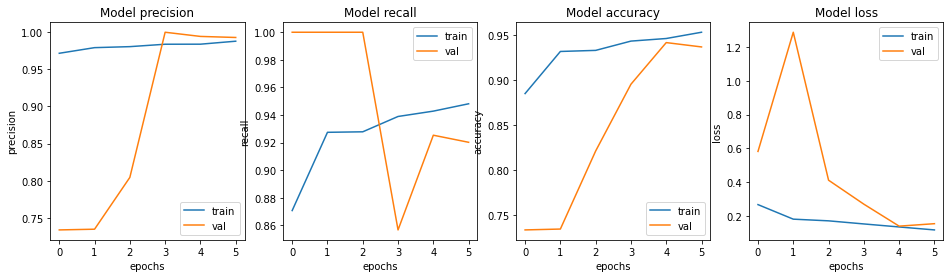

In [42]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_'+met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])


In [43]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 3s 76ms/step - loss: 0.4146 - accuracy: 0.8670 - precision: 0.8449 - recall: 0.9641
Loss: 0.41464194655418396,
Accuracy: 0.8669871687889099,
Precision: 0.8449438214302063,
Recall: 0.964102566242218


accuracyÎèÑ Ï§ëÏöîÌïòÏßÄÎßå ÏùòÎ£åÏòÅÏÉÅÏóêÏÑúÎäî recallÍ∞íÎèÑ Ï§ëÏöîÌïú ÏöîÏÜåÎùºÏÑú recallÍ∞íÏùÑ Ï°∞Í∏à Îçî Ïò¨Î†§Î≥¥ÎèÑÎ°ù ÌïòÏûê

### Augmentation + Drop out ÏÇ¨Ïö©

In [47]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)    
    ])
    return block

In [48]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),
        
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),
        
        conv_block(32),
        conv_block(64),
        
        conv_block(128),
        tf.keras.layers.Dropout(0.2),
        
        conv_block(256),
        tf.keras.layers.Dropout(0.2),
        
        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),
        
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

In [49]:
with tf.device('/GPU:0'):
    model = build_model()
    
    # ÏÑ±Í≥ºÏóê ÎåÄÌï¥ÏÑú Ï∏°Ï†ïÌïòÍ∏∞ ÏúÑÌïú metricsÏúºÎ°ú 'accuracy', 'precision', 'recall'ÏùÑ ÏÇ¨Ïö©
    METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
    
    model.compile(
        optimizer='adam', # optimizerÎ°ú 'adam'ÏùÑ ÏÇ¨Ïö©
        loss='binary_crossentropy', # Ïù¥ÎØ∏ÏßÄÏùò ÎùºÎ≤®Ïù¥ Îëê Í∞úÎ∞ñÏóê ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê "binary_cross entropy" lossÎ•º ÏÇ¨Ïö©
        metrics=METRICS
    )

###  precisionÏùÑ Í∏∞Ï§ÄÏúºÎ°ú earlystoppingÌï¥Î≥¥Í∏∞

In [50]:
from keras.callbacks import EarlyStopping
# ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑÎ•º Í∞ÄÏßàÎïå Î©àÏ∂∞Ï£ºÎäî Ìï®Ïàò Ï∂îÍ∞Ä
es=EarlyStopping(monitor='val_precision',mode='max',verbose=1,patience=5)

In [51]:
EPOCHS = 45

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds_aug,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS, callbacks=[es],
        validation_data=val_ds_aug,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/45
261/261 [==============================] - 43s 138ms/step - loss: 0.5714 - accuracy: 0.6972 - precision: 0.9016 - recall: 0.6632 - val_loss: 0.6460 - val_accuracy: 0.7327 - val_precision: 0.7327 - val_recall: 1.0000
Epoch 2/45
261/261 [==============================] - 35s 135ms/step - loss: 0.2381 - accuracy: 0.8975 - precision: 0.9686 - recall: 0.8926 - val_loss: 1.2530 - val_accuracy: 0.7327 - val_precision: 0.7327 - val_recall: 1.0000
Epoch 3/45
261/261 [==============================] - 35s 135ms/step - loss: 0.2299 - accuracy: 0.9203 - precision: 0.9720 - recall: 0.9188 - val_loss: 0.4699 - val_accuracy: 0.7788 - val_precision: 0.7684 - val_recall: 1.0000
Epoch 4/45
261/261 [==============================] - 35s 134ms/step - loss: 0.1922 - accuracy: 0.9272 - precision: 0.9773 - recall: 0.9244 - val_loss: 0.1213 - val_accuracy: 0.9529 - val_precision: 0.9588 - val_recall: 0.9777
Epoch 5/45
261/261 [==============================] - 35s 135ms/step - loss: 0.2081 - accura

In [52]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 3s 73ms/step - loss: 0.8530 - accuracy: 0.7740 - precision: 0.7399 - recall: 0.9846
Loss: 0.8530037999153137,
Accuracy: 0.7740384340286255,
Precision: 0.7398843765258789,
Recall: 0.9846153855323792


recallÍ∞íÏùÄ Ïò¨ÎùºÍ∞îÏßÄÎßå accuracyÎäî Îñ®Ïñ¥Ïßê„Ö†„Ö†

### lossÎ•º Í∏∞Ï§ÄÏúºÎ°ú earlystoppingÌï¥Î≥¥Í∏∞

In [54]:
from keras.callbacks import EarlyStopping
# ÏµúÍ≥†Ïùò Ï†ïÌôïÎèÑÎ•º Í∞ÄÏßàÎïå Î©àÏ∂∞Ï£ºÎäî Ìï®Ïàò Ï∂îÍ∞Ä
es=EarlyStopping(monitor='val_loss',mode='max',verbose=1,patience=5)

In [55]:
EPOCHS = 60

with tf.device('/GPU:0'):
    history = model.fit(
        train_ds_aug,
        steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
        epochs=EPOCHS, callbacks=[es],
        validation_data=val_ds_aug,
        validation_steps=VAL_IMG_COUNT // BATCH_SIZE,
        class_weight=class_weight,
    )

Epoch 1/60
261/261 [==============================] - 40s 136ms/step - loss: 0.1233 - accuracy: 0.9497 - precision: 0.9889 - recall: 0.9430 - val_loss: 0.0844 - val_accuracy: 0.9702 - val_precision: 0.9906 - val_recall: 0.9685
Epoch 2/60
261/261 [==============================] - 35s 135ms/step - loss: 0.1152 - accuracy: 0.9564 - precision: 0.9880 - recall: 0.9531 - val_loss: 0.2678 - val_accuracy: 0.8894 - val_precision: 0.9969 - val_recall: 0.8521
Epoch 3/60
261/261 [==============================] - 35s 135ms/step - loss: 0.1144 - accuracy: 0.9533 - precision: 0.9919 - recall: 0.9450 - val_loss: 0.1515 - val_accuracy: 0.9385 - val_precision: 0.9972 - val_recall: 0.9190
Epoch 4/60
261/261 [==============================] - 35s 135ms/step - loss: 0.1111 - accuracy: 0.9600 - precision: 0.9884 - recall: 0.9575 - val_loss: 14.9769 - val_accuracy: 0.7317 - val_precision: 0.7317 - val_recall: 1.0000
Epoch 5/60
261/261 [==============================] - 35s 134ms/step - loss: 0.1859 - accur

In [56]:
loss, accuracy, precision, recall = model.evaluate(test_ds)
print(f'Loss: {loss},\nAccuracy: {accuracy},\nPrecision: {precision},\nRecall: {recall}')

39/39 [==============================] - 3s 75ms/step - loss: 0.4719 - accuracy: 0.8798 - precision: 0.8870 - recall: 0.9256
Loss: 0.47190162539482117,
Accuracy: 0.879807710647583,
Precision: 0.8869779109954834,
Recall: 0.9256410002708435


Í≥†Î£®Í≥†Î£® ÎÜíÍ≤å ÎÇòÏò® Í≤É Í∞ôÎã§.

# üåü Î£®Î∏åÎ¶≠ ÌèâÍ∞Ä

|ÌèâÍ∞ÄÎ¨∏Ìï≠|ÏÉÅÏÑ∏Î¨∏Ìï≠|
|:------|:---|
|1. ÏùòÎ£åÏòÅÏÉÅÏùÑ Ï≤òÎ¶¨ÌïòÎäî CNN Í∏∞Î∞ò Îî•Îü¨Îãù Î™®Îç∏Ïù¥ Ïûò Íµ¨ÌòÑÎêòÏóàÎã§.|Î™®Îç∏ ÌïôÏäµÏù¥ ÏïàÏ†ïÏ†ÅÏúºÎ°ú ÏàòÎ†¥ÌïòÎäî Í≤ÉÏùÑ ÏãúÍ∞ÅÌôîÎ•º ÌÜµÌï¥ ÌôïÏù∏ÌïòÏòÄÎã§.|
|2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ, Î™®Îç∏Íµ¨ÏÑ± Îì±Ïùò Í≥ºÏ†ïÏùò Îã§ÏñëÌïú Ïã§ÌóòÏù¥ Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÎã§.|regularization, augmentation Îì±Ïùò Í∏∞Î≤ïÏùò ÏÇ¨Ïö© Ïó¨Î∂ÄÏóê Îî∞Î•∏ Î™®Îç∏ ÏÑ±Îä• Ï∏°Ï†ïÏù¥ ablation study ÌòïÌÉúÎ°ú Ï≤¥Í≥ÑÏ†ÅÏúºÎ°ú ÏàòÌñâÎêòÏóàÎã§.|
|3. Ïã§ÏäµÏΩîÎìúÎ•º Ïûò Í∞úÏÑ†ÌïòÏó¨ ÌèêÎ†¥ Í≤ÄÏ∂ú Ï†ïÌôïÎèÑÍ∞Ä Ï∂îÍ∞ÄÎ°ú Ìñ•ÏÉÅÎêòÏóàÎã§.|Accuracy Í∏∞Ï§Ä 85%Ïóê ÎèÑÎã¨ÌïòÏòÄÎã§.|

1. ÌïôÏäµÏùÑ ÎèåÎ¶¨Í≥† ÎÇòÏÑú ÏàòÏπòÎì§ÏùÑ Í∑∏ÎûòÌîÑÎ°ú ÏãúÍ∞ÅÌôîÌïòÏó¨ ÌôïÏù∏Ìï¥Î¥Ñ
2. augmentation Í∏∞Î≤ïÎèÑ Í≥†Î†§Ìï¥Î≥¥Í≥† drop outÎèÑ ÏóÜÏï†Îäî Îì± Îã§ÏñëÌïòÍ≤å ÌïôÏäµÌï¥Î¥Ñ
3. accuracyÍ∞Ä 85%ÎÑòÏùå

# üåüÌöåÍ≥†

Îç∞Ïù¥ÌÑ∞ imbalance Î¨∏Ï†úÍ∞Ä ÏûàÏùÑ Îïå Ïù¥Îü∞ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÎäî Î∞©Î≤ïÏúºÎ°ú Weight balancingÏù¥ÎùºÎäî ÌÖåÌÅ¨ÎãâÏù¥ ÏûàÎã§Îäî Í±∏ ÏïåÍ≤åÎêòÏóàÍ≥†, Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏßÄ ÏïäÏùÑ Îïå augmentationÍ∏∞Î≤ïÎèÑ Í≥†Î†§Ìï¥Î≥¥Î©¥ Ï¢ãÎã§Îäî Í≤ÉÎèÑ ÏïåÍ≤å ÎêòÏñ¥ ÏùòÎØ∏ÏûàÏóàÎçò explorationÏù¥ÏóàÎçò Í≤É Í∞ôÎã§.

# üåü Ï∞∏Í≥†
[ÏäπÌôòÎãòÏΩîÎìú](https://github.com/RobotPoly/exploration/blob/main/%5BE-11%5DPneumonia/%5BE-11%5DPneumonia.ipynb)